In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

%matplotlib inline

### Normal distribution

The `normal` or `Gaussian` distribution is a continuous probability distribution.  It is used to model numerous real-world phenomena such as the heights of males in a population, errors in instrumentation, duration of cab rides.
Because so many of these phenomena can be modeled or *at least approximated* using normal distributions, many statistical tests assume distributions of your data are normal.
What we mean by modeling a problem by a Gaussian is to find the parameters that we can use to build the Gaussian distribution that best explains our data.


### Properties of the Normal Distribution

The Gaussian curve is generally bell-shaped and symmetrical.  All curves have the same general shape, but their center depends on the **mean** of the distribution and their spread depends on it's **standard deviation**.  Therefore, the `parameters` for a Normal are its mean($\mu$) and standard deviation($\sigma$).  The standard deviation can also be referred to as scale, in addition to spread.

We write a random variable distributed according to a `Normal` with paramters $\mu$ and $\sigma$ as:
$$
X \sim \mathcal{N} (\mu,\sigma)
$$

Remember that for continuous distributions, the probability distribution is typically represented as a continuous curve because it can usually take values in all the range.

Below is an example of a Normal Distribution with $\mu$ = 0 and $\sigma$ = 1.  This is also known as the Standard Normal Distribution.

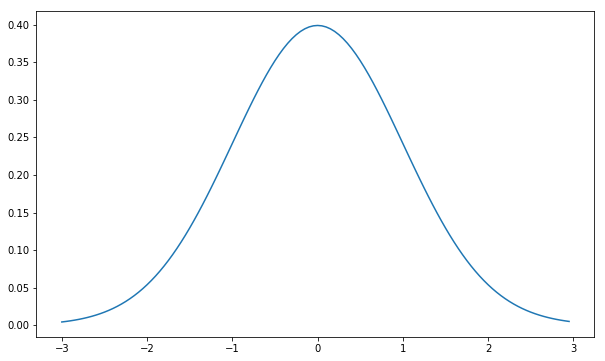

In [2]:
x = np.arange(-3, 3, 0.05)
p_x = [norm.pdf(val, 0, 1) for val in x]

plt.figure(figsize=(10, 6))
plt.plot(x, p_x)

### Example

The two distributions below have the following parameters:

  Blue: ($\mu = 0 $, $\sigma = 1$) 
  Red: ($\mu = 2 $, $\sigma = 5$) 


Note that the distributions have different shapes.  The red distribution is centered around 2 instead of 0, so it's shifted to the right.  It is also much more spread out because it's standard deviation is 5 instead of 1.  It covers a much wider range of numbers than the blue one does.  Notice that this results in a decrease of the probabilities.

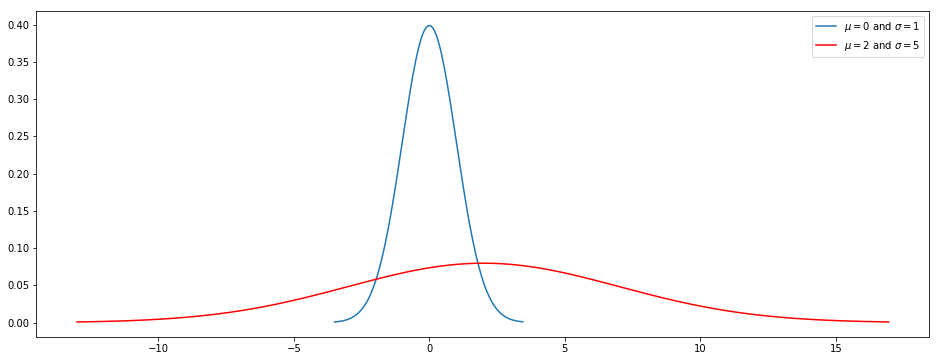

In [3]:
plt.figure(figsize=(16, 6))

x = np.arange(-3.5, 3.5, 0.05)
p_x = [norm.pdf(val, 0, 1) for val in x]
plt.plot(x, p_x, label="$\mu = 0 $ and $\sigma = 1$")

x = np.arange(-13, 17, 0.05)
p_x = [norm.pdf(val, 2, 5) for val in x]
plt.plot(x, p_x, label="$\mu = 2 $ and $\sigma = 5$", color='r')
plt.legend()


### Location and Range of High-Probability Values

Let's talk more about the two curves above.
For the blue curve ($\mu = 0$ and $ \sigma = 1$), the range of values with high probabilities is small.
Whereas for the red curve ($\mu = 2$ and $\sigma = 5$), the range of values with low probabilities is large.
This makes sense because either way, the probabilities have to add up to 1.  If there is a smaller range of numbers, they naturally have higher probabilities.

Think of this in terms of the probability distribution of the biased die from the binomial example.  If you were to draw random value -- just like we were sampling from the die -- what do you think the values obtained from the first distribution would look like? Hopefully, you're guessing 0, or numbers close to 0.
What do you think the range of values from the `red` probability distribution would look like?

### More Examples
In the image below, notice how the mean moves the center of the curve along the x axis and how the standard deviation affects it's spread and subsequently it's probabilities.
Also, notice how the curves seem to flatten out along zero at either end.  They are actually ever so slightly above zero because while **highly** unlikely, those values could still, in theory, occur.

<img src="mean_var_diffs.png" alt="drawing" style="width:600px;"/>

### Data in the distribution

In the normal distribution, the area with the highest density lies close to the mean.  Thus, when we sample from a normal, the bulk of the observations generated from a normal distribution lie near the mean.  Specifically, in the normal, the mode, the mean and the median are represented by the same value.

In the code below, we are randomly selecting a numbers from the normal distribution with a mean of 70 and standard deviation of 4.  By default, it will return a single value, but the 5 in the second example indicates we want 5 values returned.  Notice that all these values are fairly close to 70.


In [15]:
#  Avg adult male heights are on average 70 inches  (5'10) with a standard deviation of 4 inches.
# according to http://www.usablestats.com

print("The height of a randomly selected male is: ", end="")
print(np.random.normal(70, 4))

print("The heights of a randomly selected sample of 5 males is: ", end="")
print(np.random.normal(70, 4, 5))



The height of a randomly selected male is: 68.62344288983401
The heights of a randomly selected sample of 5 males is: [68.60318633 71.09738409 71.73434383 72.71363318 66.01842875]


### Properties of the Normal Distribution

The probability density function for a random variable $X \sim \mathcal{N} (\mu,\sigma)$ is:
$$ 
    p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{(x-u)^2}{2\sigma^2}}
$$

Since the sample space is uncountably infinite, the probability of each event is ~0. Therefore, instead of the `pmf`, continuous random variables have a `pdf`
  
### `pdf` versus `pmf`

A `pdf` is conceptually similar to a `pmf` but instead of giving you a probability, it tells you the density around a particular point. You can think of it as mass (as in `pmf`) normalized by a small area. For example, in the  $x \sim \mathcal{N}(0, 1)$ probability density around $0$ is much higher than the density around $-2.5$

Since $X$ is continuous, the `pdf` is also continuous.  Furthermore, the total area under the `pdf` curve sums to 1, just like the pmf.  

**Remember**: `pdf` is for continuous funtions and `pmf` is for discrete functions. 


### 68-95-99.7 Rule
Another defining property of Normal Distributions is the way the data is distributed around the mean.  It's not just symmetric.  About 68% of the data will always fall within one standard deviation of the mean, 95% within 2 standard deviations and 99.7% within 3 standard deviations.  This is why the only 2 parameters we need to define a Normal Distribution are it's mean and standard deviation.

<img src="68_95_99_rule.jpg" alt="drawing" style="width:300px;"/>

Below we explore each section separately.

### Density within One Standard Deviation From the Mean
The code below outputs a model highlighting the area of the curve within one standard deviation of the mean.

Text(2.3, 0.03, '13%')

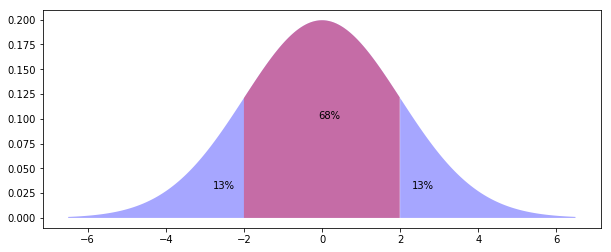

In [34]:
# We manually implement the CDF
def computePDF_normal (x, mu, sigma):
     return 1.0/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2.0 / (2 * sigma**2))
f, (ax1) = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(10)
x_values = np.array(np.arange(-6.5,2,0.01))
ax1.fill_between(x=x_values, y1=computePDF_normal(x_values, 0, 2) ,facecolor="blue",alpha=0.35)
x_values = np.arange(2,6.5,0.01)
ax1.fill_between(x=x_values, y1= computePDF_normal(x_values, 0, 2),facecolor="blue",alpha=0.35)
x_values = np.arange(-2,2,0.01)
ax1.fill_between(x=x_values, y1= computePDF_normal(x_values, 0, 2),facecolor='red',alpha=0.35)
ax1.text(x=-2.8, y=0.03, s= "13%")
ax1.text(x=-0.1, y=0.1, s= "68%")
ax1.text(x=2.3, y=0.03, s="13%")


### Density within Two Standard Deviations From the Mean
The code below outputs a model highlighting the area of the curve within 2 standard deviations of the mean.

Text(4.8, 0.03, '2.5%')

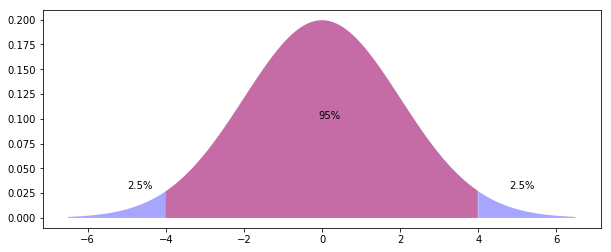

In [32]:
f, (ax2) = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(10)

x_values = np.array(np.arange(-6.5,4,0.01))
#print computePDF(x_values, 0, 0.1)
ax2.fill_between(x=x_values, y1=computePDF_normal(x_values, 0, 2) ,facecolor="blue",alpha=0.35)
x_values = np.arange(4,6.5,0.01)
ax2.fill_between(x=x_values, y1= computePDF_normal(x_values, 0, 2),facecolor="blue",alpha=0.35)
x_values = np.arange(-4,4,0.01)
ax2.fill_between(x=x_values, y1= computePDF_normal(x_values, 0, 2),facecolor='red',alpha=0.35)

ax2.text(x=-5, y=0.03, s= "2.5%")
ax2.text(x=-0.1, y=0.1, s= "95%")
ax2.text(x=4.8, y=0.03, s="2.5%")

### Density within Three Standard Deviations From the Mean
The code below outputs a model highlighting the area of the curve within 3 standard deviations of the mean.

Text(6.1, 0.03, '0.15%')

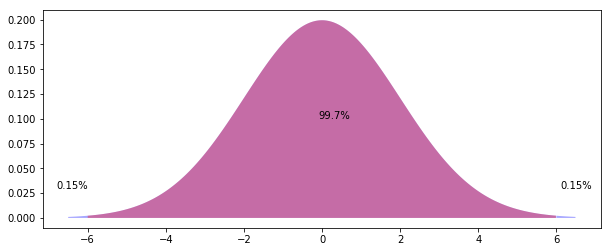

In [31]:
f, (ax3) = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(10)

x_values = np.array(np.arange(-6.5,6,0.01))
ax3.fill_between(x=x_values, y1=computePDF_normal(x_values, 0, 2) ,facecolor="blue",alpha=0.35)
x_values = np.arange(6,6.5,0.01)
ax3.fill_between(x=x_values, y1= computePDF_normal(x_values, 0, 2),facecolor="blue",alpha=0.35)
x_values = np.arange(-6,6,0.01)
ax3.fill_between(x=x_values, y1= computePDF_normal(x_values, 0, 2),facecolor='red',alpha=0.35)
ax3.text(x=-6.8, y=0.03, s= "0.15%")
ax3.text(x=-0.1, y=0.1, s= "99.7%")
ax3.text(x=6.1, y=0.03, s="0.15%")

### Illustrating density

* We sample $1000$ values from a standard normal distribution $\mathcal{N}(\mu=0, \sigma=1)$

* We bin the values into 20 bins and plot them as a histogram

  *  Counts for each bin are shown on the $y-$axis

In [6]:
np.random.seed(225)
gaussianSamples = np.random.normal(0, 1, 1000)
print(gaussianSamples[0:10])

[ 0.31001023 -1.8327412  -0.60899199 -1.30249957  0.88835402  0.20815824
 -1.40900609  1.87217034  0.34335299 -0.36394499]


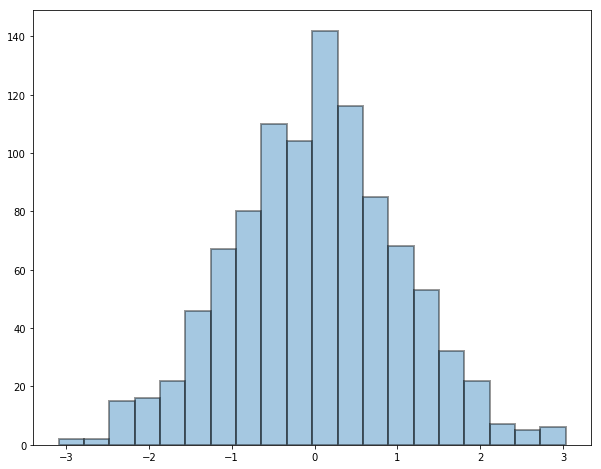

In [7]:
plt.figure(figsize=(10, 8))
_ = plt.hist(gaussianSamples, bins = 20, edgecolor="k", linewidth=2, alpha=0.4)

# Theoretical vs. Empirical Distribution

* We plot the pdf on top of the histogram to see how well it matches the sequence data
* Why doesn't the histogram match the pdf curve exactly?

C:\Users\khj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


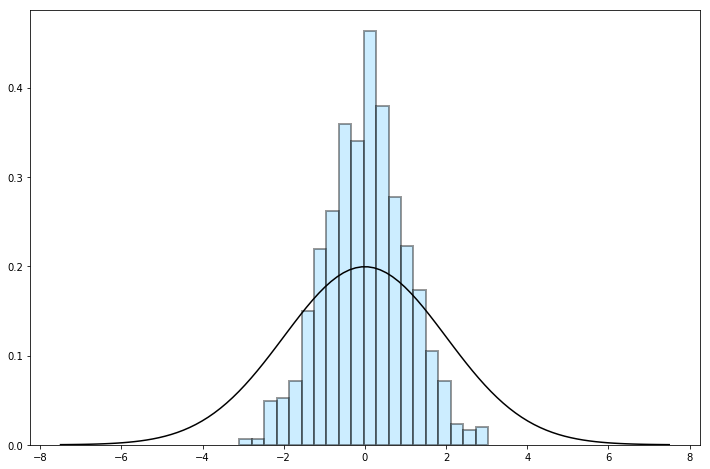

In [8]:
plt.figure(figsize=(12, 8))

bins = np.linspace(-7.5,7.5, 100)

probabilityForgaussianSamples = [ computePDF_normal(x, 0, 2) for x in bins]

# note the params color, alpha and normed. 
# Why is the param normed necessary here?
_ = plt.hist(gaussianSamples, bins = 20, edgecolor="k", color='#80d4ff', linewidth=2, alpha=0.4, normed=True)

plt.plot(bins, probabilityForgaussianSamples, color="k")


### Probability Density Versus Probability Mass

- Based on the previous definitions, what is the probability of $0$?


- What is the pdf of $0$? (positive, negative or zero?)


In [9]:
from scipy.stats import norm

mu = 0
sigma = 2
norm.pdf(0, mu, sigma)


0.19947114020071635

In [10]:
some_vals = [-2, -1, -0.5, -0.2, -0,1, 0, 0.1, 0.2, 0.5, 1, 2 ]

mu = 0
sigma = 2

print("For mu=%d and sigma=%f:" % (mu, sigma))


for val in some_vals:
    print("\tThe probability density of x= %f is %f " % 
          (val, computePDF_normal(val, 0, 2)))


For mu=0 and sigma=2.000000:
	The probability density of x= -2.000000 is 0.120985 
	The probability density of x= -1.000000 is 0.176033 
	The probability density of x= -0.500000 is 0.193334 
	The probability density of x= -0.200000 is 0.198476 
	The probability density of x= 0.000000 is 0.199471 
	The probability density of x= 1.000000 is 0.176033 
	The probability density of x= 0.000000 is 0.199471 
	The probability density of x= 0.100000 is 0.199222 
	The probability density of x= 0.200000 is 0.198476 
	The probability density of x= 0.500000 is 0.193334 
	The probability density of x= 1.000000 is 0.176033 
	The probability density of x= 2.000000 is 0.120985 


In [11]:
print("The sum of the probility densities computed above is: ", end="\t")

print(sum([norm.pdf(x, 0, 2) for x in some_vals]))

The sum of the probility densities computed above is: 	2.1518536163942685


* Why is the sum here greater than 0? 

  * Aren't the probabilities of the elements in the sample space supposed to sum to 1?

* Remember that the probability at a single point is 0

* Therefore, pdf computes the probability of small interval. (ex. $x-0.01 < x <  x+0.01$)

* Therefore, if we normalize the `cdf` of `0` by multiplying by the size of the interval it represents, the value becomes:

In [12]:
print("The sum of the probility densities computer above is: ", end="\t")
print(sum([computePDF_normal(x, 0, 2) * 0.001 for x in some_vals]))

The sum of the probility densities computer above is: 	0.0021518536163942685


### Summing Probabilities to 1


<img src="images/norm_0_2.png" alt="drawing" style="width:700px;"/>


In [13]:
norm_cdf_sum = 0

for x in np.arange(-7, 7, 0.001):
    norm_cdf_sum +=  computePDF_normal(x, 0, 2) * 0.001

print("The sum of the probility densities computer above is: %s" % norm_cdf_sum, end="\t")


The sum of the probility densities computer above is: 0.9995347417143292	